<a href="https://colab.research.google.com/github/sachinraghav28/data-science/blob/main/EMAIL_SPAM__DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd

In [ ]:
#read the data
df = pd.read_csv('/content/spam.csv', encoding='latin1')

In [ ]:
#display the first 10 rows
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
#get cols names
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [ ]:
#drop unnecessary cols
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
#rename cols
df.rename(columns={'v1':'output','v2':'sms/email'},inplace=True)
df

,output,sms/email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
#check Nulls
df.isnull().sum()

output       0
sms/email    0
dtype: int64

In [ ]:
#check duplicates
num_duplicates = df.duplicated().sum()
num_duplicates, df.shape #shape before dropping

(403, (5572, 2))

In [ ]:
#drop duplicates
df = df.drop_duplicates(keep='first')
df.shape #shape after dropping

(5169, 2)

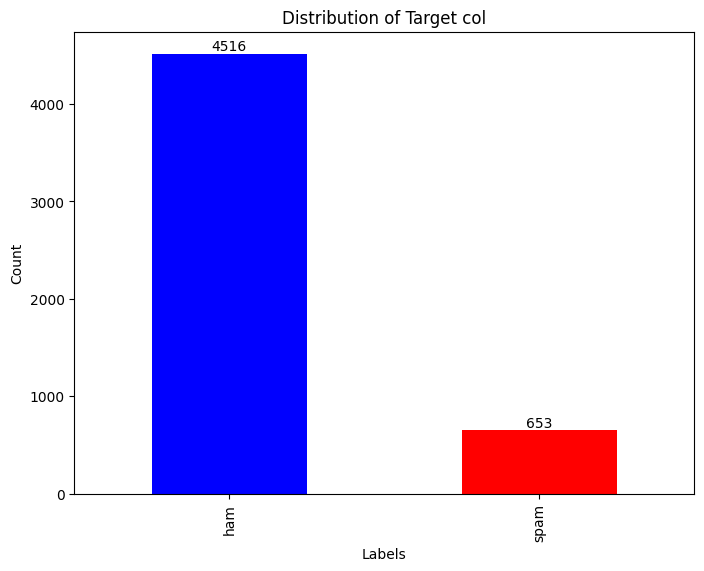

In [ ]:
import matplotlib.pyplot as plt


value_counts = df['output'].value_counts()
value_counts


plt.figure(figsize=(8, 6))
ax = value_counts.plot(kind='bar', color=['blue', 'red'])
plt.title('Distribution of Target col')
plt.xlabel('Labels')
plt.ylabel('Count')

#add num above each col
for container in ax.containers:
    ax.bar_label(container, label_type='edge')

plt.show()

In [ ]:
# Converting 'ham' to 0 and 'spam' to 1 (encoding)
df['output'] = df['output'].map({'ham': 0, 'spam': 1})
df['output']

<ipython-input-35-e542cf1e1bd0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['output'] = df['output'].map({'ham': 0, 'spam': 1})


0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: output, Length: 5169, dtype: int64

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
#get num of characters in each sms
df['num_of_chars']=df['sms/email'].apply(len)
df



<ipython-input-37-7da5adbd65a2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_of_chars']=df['sms/email'].apply(len)


,output,sms/email,num_of_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [ ]:
# Tokenize the 'sms' (get each word individually ),count these words
tokenized_sms = []
length_of_sms = []

for sms in df['sms/email']:
    tokens = nltk.word_tokenize(sms)
    tokenized_sms.append(tokens)
    length_of_sms.append(len(tokens))


df['tokenized_sms'] = tokenized_sms
df['num_of_words'] = length_of_sms

df.head()

<ipython-input-38-c8a857154744>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokenized_sms'] = tokenized_sms
<ipython-input-38-c8a857154744>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_of_words'] = length_of_sms


,output,sms/email,num_of_chars,tokenized_sms,num_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point, ,, crazy, .., Avail...",24
1,0,Ok lar... Joking wif u oni...,29,"[Ok, lar, ..., Joking, wif, u, oni, ...]",8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",37
3,0,U dun say so early hor... U c already then say...,49,"[U, dun, say, so, early, hor, ..., U, c, alrea...",13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do, n't, think, he, goes, to, usf, ,,...",15


In [ ]:
from nltk.tokenize import sent_tokenize

#get num of sentence in each sms

num_sentences = []

for sms in df['sms/email']:
    sentences = sent_tokenize(sms)
    num_sentences.append(len(sentences))


df['num_of_sent'] = num_sentences

df.head()

<ipython-input-39-90db63d5dd7d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_of_sent'] = num_sentences


,output,sms/email,num_of_chars,tokenized_sms,num_of_words,num_of_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point, ,, crazy, .., Avail...",24,2
1,0,Ok lar... Joking wif u oni...,29,"[Ok, lar, ..., Joking, wif, u, oni, ...]",8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",37,2
3,0,U dun say so early hor... U c already then say...,49,"[U, dun, say, so, early, hor, ..., U, c, alrea...",13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do, n't, think, he, goes, to, usf, ,,...",15,1


In [ ]:
#describe these 3 cols to get more info

df[['num_of_chars','num_of_words','num_of_sent']].describe()

,num_of_chars,num_of_words,num_of_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
# describe these cols for ham sms/email
df[df['output']==0][['num_of_chars','num_of_words','num_of_sent']].describe()

,num_of_chars,num_of_words,num_of_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
# describe these cols for spam sms/email
df[df['output']==1][['num_of_chars','num_of_words','num_of_sent']].describe()

,num_of_chars,num_of_words,num_of_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


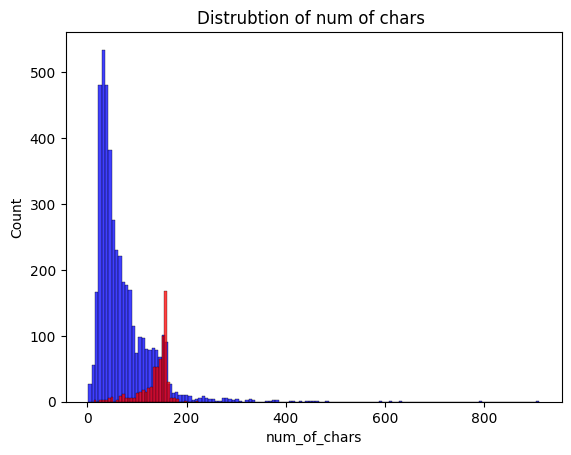

In [ ]:
import seaborn as sns
sns.histplot(df[df['output']==0]['num_of_chars'],color='blue')
sns.histplot(df[df['output']==1]['num_of_chars'],color='red')
plt.title('Distrubtion of num of chars ')
plt.show()

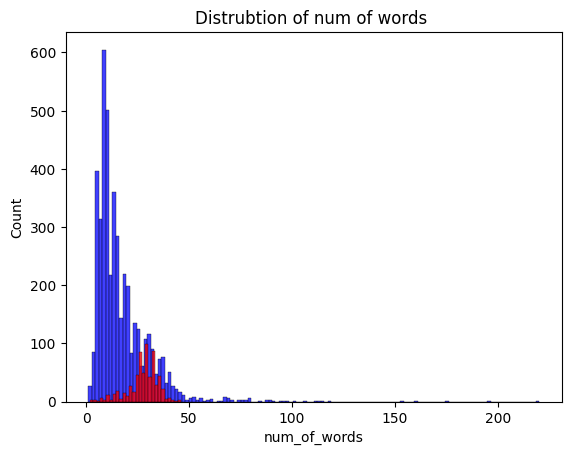

In [ ]:
import seaborn as sns
sns.histplot(df[df['output']==0]['num_of_words'],color='blue')
sns.histplot(df[df['output']==1]['num_of_words'],color='red')
plt.title('Distrubtion of num of words ')
plt.show()


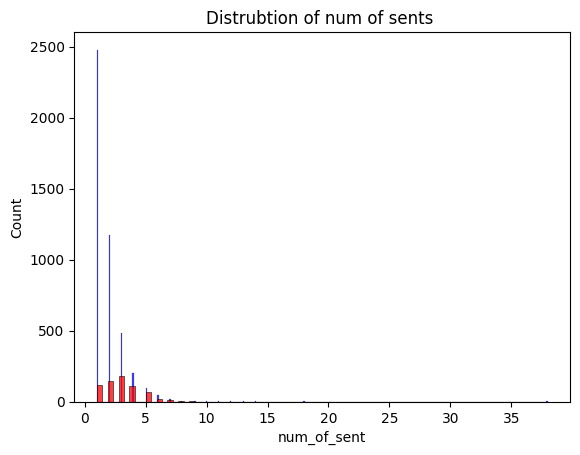

In [ ]:
import seaborn as sns
sns.histplot(df[df['output']==0]['num_of_sent'],color='blue')
sns.histplot(df[df['output']==1]['num_of_sent'],color='red')
plt.title('Distrubtion of num of sents ')
plt.show()

In [ ]:
df2=df[['output','num_of_chars','num_of_words','num_of_sent']]
df2

,output,num_of_chars,num_of_words,num_of_sent
0,0,111,24,2
1,0,29,8,2
2,1,155,37,2
3,0,49,13,1
4,0,61,15,1
...,...,...,...,...
5567,1,161,35,4
5568,0,37,9,1
5569,0,57,15,2
5570,0,125,27,1


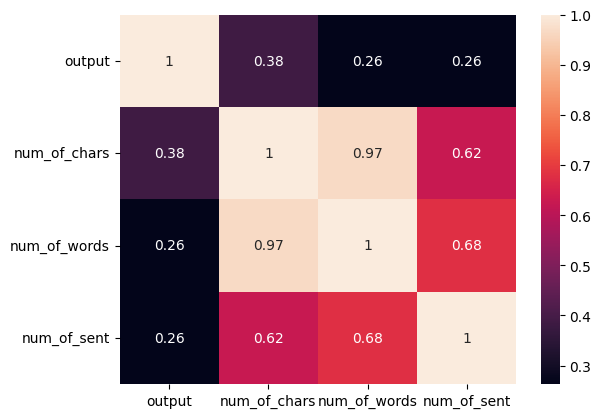

In [ ]:
sns.heatmap(df2.corr(),annot=True)
plt.show()

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('dancing')


'danc'

In [ ]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
def process_txt(txt):
    txt=txt.lower() # cvt all sms to lower casechase letters
    txt=nltk.word_tokenize(txt)

    y=[]
    for i in txt: #include nums
        if i.isalnum()==True:
            y.append(i)
    txt=y[:]
    y.clear()

    for i in txt:
        if i not in stopwords.words('english')and i not in string.punctuation: # ignore stopwords & punctuation
            y.append(i)
    txt=y[:]
    y.clear()
    for i in txt:
        y.append(ps.stem(i)) #get stemming


    return " ".join(y)

In [ ]:
txt="hello 20 %"
process_txt(txt)

'hello 20'

In [ ]:
print(df['sms/email'][2000])
print('_'*100)
print(process_txt(df['sms/email'][2000]))

But i'll b going 2 sch on mon. My sis need 2 take smth.
____________________________________________________________________________________________________
b go 2 sch mon si need 2 take smth


In [ ]:
#apply fun to all data
df['text_transform']=df['sms/email'].apply(process_txt)
df

<ipython-input-56-30ad378a04ff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_transform']=df['sms/email'].apply(process_txt)


,output,sms/email,num_of_chars,tokenized_sms,num_of_words,num_of_sent,text_transform
0,0,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point, ,, crazy, .., Avail...",24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,"[Ok, lar, ..., Joking, wif, u, oni, ...]",8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,"[U, dun, say, so, early, hor, ..., U, c, alrea...",13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do, n't, think, he, goes, to, usf, ,,...",15,1,nah think goe usf live around though
...,...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,"[This, is, the, 2nd, time, we, have, tried, 2,...",35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,"[Will, Ì_, b, going, to, esplanade, fr, home, ?]",9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,"[Pity, ,, *, was, in, mood, for, that, ., So, ...",15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,"[The, guy, did, some, bitching, but, I, acted,...",27,1,guy bitch act like interest buy someth els nex...


In [ ]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,min_word_length=4,background_color='black')

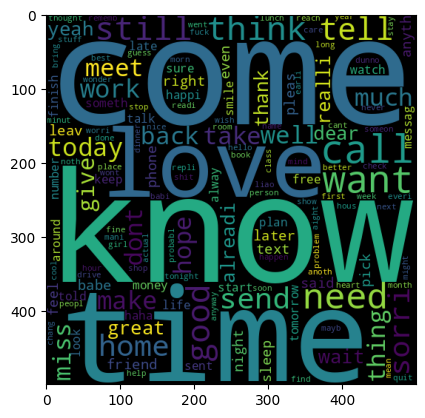

In [ ]:
# get the most frequently ham words
ham_words=wc.generate(df[df['output']==0]['text_transform'].str.cat(sep=" "))
plt.imshow(ham_words)
plt.show()

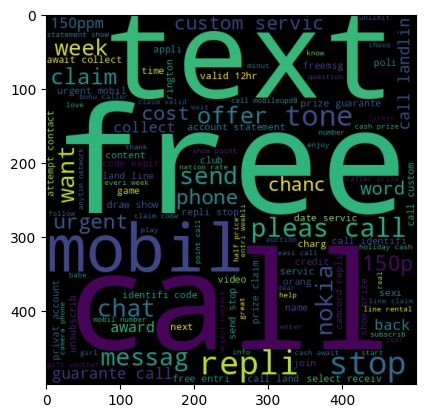

In [ ]:
# get the most frequently spam words
spam_words=wc.generate(df[df['output']==1]['text_transform'].str.cat(sep=" "))
plt.imshow(spam_words)
plt.show()

In [ ]:
spam_corpus=[]
for msg in df[df['output']==1]['text_transform'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


# get the 50 most frequent words in spam emails/SMS
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(50))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [ ]:
ham_corpus=[]
for msg in df[df['output']==0]['text_transform'].tolist():
    for word in msg.split():
        ham_corpus.append(word)


# get the 50 most frequent words in ham emails/SMS
from collections import Counter
pd.DataFrame(Counter(ham_corpus).most_common(50))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


Shape of X_train: (4135, 3000)
Shape of y_train: (4135,)
Shape of X_test: (1034, 3000)
Shape of y_test: (1034,)
0.8655705996131529
[[779 124]
 [ 15 116]]
              precision    recall  f1-score   support

           0       0.98      0.86      0.92       903
           1       0.48      0.89      0.63       131

    accuracy                           0.87      1034
   macro avg       0.73      0.87      0.77      1034
weighted avg       0.92      0.87      0.88      1034



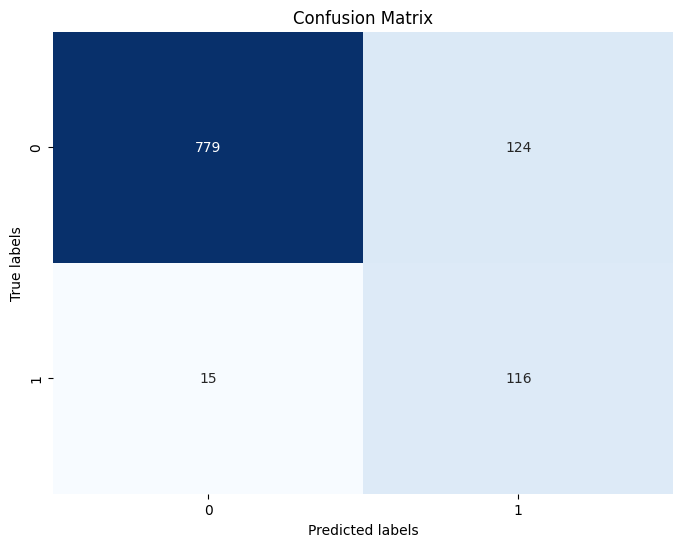

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

#feature selection
X = tfidf.fit_transform(df['text_transform']).toarray()
y=df['output'].values
from sklearn.model_selection import train_test_split

#splitting
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=1,stratify=y,shuffle=True)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

from sklearn.naive_bayes import GaussianNB ,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score ,confusion_matrix,classification_report

gnb=GaussianNB()

gnb.fit(X_train,y_train)
y_pred_gnb=gnb.predict(X_test)

print(accuracy_score(y_test,y_pred_gnb))
print(confusion_matrix(y_test,y_pred_gnb))
print(classification_report(y_test,y_pred_gnb))

cm = confusion_matrix(y_test, y_pred_gnb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

0.9796905222437138
[[902   1]
 [ 20 111]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       903
           1       0.99      0.85      0.91       131

    accuracy                           0.98      1034
   macro avg       0.98      0.92      0.95      1034
weighted avg       0.98      0.98      0.98      1034



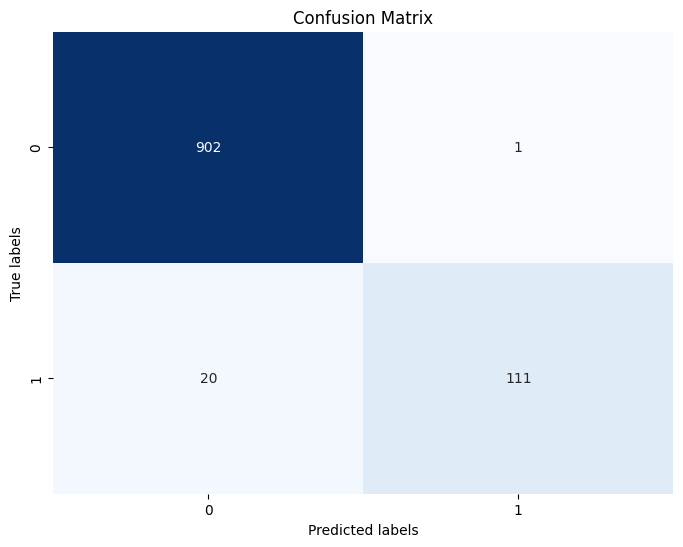

In [ ]:
mnb=MultinomialNB()

mnb.fit(X_train,y_train)
y_pred_mnb=mnb.predict(X_test)

print(accuracy_score(y_test,y_pred_mnb))
print(confusion_matrix(y_test,y_pred_mnb))
print(classification_report(y_test,y_pred_mnb))

cm = confusion_matrix(y_test, y_pred_mnb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

0.9835589941972921
[[901   2]
 [ 15 116]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       903
           1       0.98      0.89      0.93       131

    accuracy                           0.98      1034
   macro avg       0.98      0.94      0.96      1034
weighted avg       0.98      0.98      0.98      1034



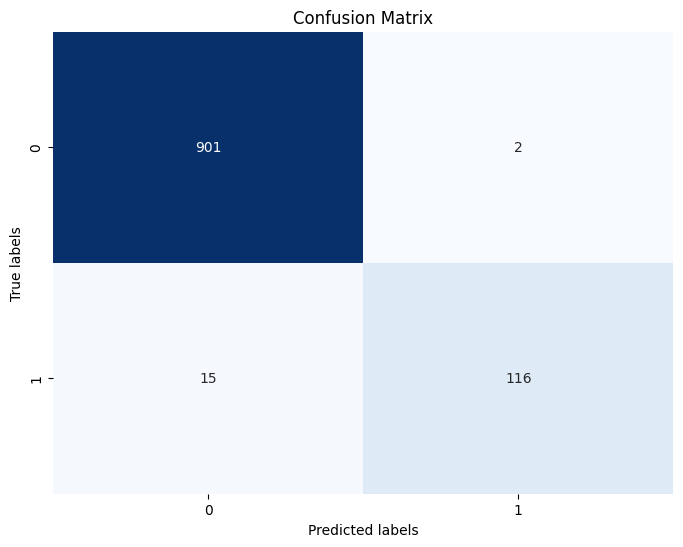

In [ ]:
bnb=BernoulliNB()


bnb.fit(X_train,y_train)
y_pred_bnb=bnb.predict(X_test)

print(accuracy_score(y_test,y_pred_bnb))
print(confusion_matrix(y_test,y_pred_bnb))
print(classification_report(y_test,y_pred_bnb))

cm = confusion_matrix(y_test, y_pred_bnb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()